# Methoden-Workshop Machine Learning & AIA
1. **Inhaltsanalyse-Daten einlesen uns ansehen** mit der Python-Bibliothek für Data Management ``pandas``.
2. **Text in Features umwandeln** - mit ``sklearn``'s ``Vectorizer``.
3. **Classification Functions** auswählen.
4. Datensatz in **Train und Test Set** aufteilen.
5. Die Funktion auf den Trainingsdaten **fitten** aka. **trainieren**.
6. **Evaluieren** - Die Predictions mit der (manuellen) Codierung auf dem **Test Set abgleichen**.

Dies ist die Extended Version des `ML-Workshop_Notebook_basic.ipynb` für die von euch, die noch ein bisschen mehr probieren wollen! Hinzugekommen sind:

7. **Tf-Idf**-Gewichtung für die Worthäufigkeiten anstelle von absoluten Häufigkeiten.

8. Ein paar **Pre-Processing-Optionen** mit dem `CountVectorizer`/`TfidfVectorizer`.

9. Auswertung mit Camera Ready **Confusion Matrix** für euer Paper.

011. Trainierten **Classifier speichern** (für dich und andere) und auf komplett neuen Daten **anwenden**.

Auchtung! Für dieses Notebook müsst ihr die Packages `matplotlib` und `seaborn` installieren. 

Von: [anke.stoll@hhu.de](mailto:anke.stoll@hhu.de) <br>
Last edit: 25.02.2021

## 1. Von Excel nach Python und wieder zurück mit ``pandas``

In [1]:
import pandas as pd #Abkürzung für Faule und aus Konvention.

#### Daten einlesen - .csv or .txt oder Excel

Wo liegt/wie heißt der Datensatz?

In [2]:
df = pd.read_csv("Data Sets/HateSpeech_Tweets_DataSet.csv",
                 sep=",") #Ändern bei Excel auf ";")

#### Check out your data frame

In [3]:
df.head() #Zeigt die ersten 10 Zeilen.

,Tweet,HateSpeech
0,#Rosenmontag ist abgesagt. #Rapefugees also wi...,YES
1,bitte nicht die #Türkei zum #EU-Mitglied mache...,NO
2,Wieso bekommen #rapefugees mehr als unsere Har...,NO
3,Den verfluchten #Rapefugees den Krieg erklären...,YES
4,War das Wochenende im Ruhrpott unterwegs. Über...,YES


In [4]:
df.tail(10) #Oder die letzen 10.

,Tweet,HateSpeech
459,"Also ich finde, Europa ist sich einig wie noch...",NO
460,#dieanstalt #flüchtlinge und #Asylanten benöti...,YES
461,Die Regierung hat nichts im Griff. Das gibt ho...,NO
462,"Das gerechte in #Deutschland ist ja, dass nich...",NO
463,#radikaler #Imam in #Dänemark ruft z #Steinigu...,NO
464,Wo ist das Problem? Für Moslems ist es doch sc...,YES
465,Simone #Peter hat seit 7 Monaten und weit über...,NO
466,Bin gespannt auf #onebillionrising. Hoffentlic...,YES
467,#kipping ist so dumm! wenn #asylanten Wohnunge...,NO
468,Zukünft. #CDU Wähler aus #MEA marodieren auf M...,YES


In [5]:
len(df) #Anzahl der Zeilen.

469

In [6]:
df["HateSpeech"].value_counts() #Überblick zu den Werten in einer Spalte.

NO     315
YES    154
Name: HateSpeech, dtype: int64

## 2. Text zu Features - Unabhängigen Variablen programmieren

Die zweite super awesome Python Bibliothek heißt ``sklearn``. In dieser Bibliothek finden wir alles, was wir für ML brauchen. Auch das ML mit Text wird uns besonders einfach gemacht. In ``sklearn`` gibt es eine Unterabteilung ``feature_extraction.text``. Hier finden wir Funktionen, die uns das Umwandeln von Text zu Features (Unigramme oder N-Gramme) sehr einfach machen! 

Wir benutzen jetzt mal den ``TfidfVectorizer``. Dies ist eine etablierte und die beliebteste Gewichtung im ML mit Texte. Full documentation auf der [sklearn Website](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Oder lest [hier](https://nlp.stanford.edu/IR-book/html/htmledition/tf-idf-weighting-1.html) nach.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

All vectorizers have several parameters that you can modify. Der Tfidf Vectorizer kann genau so genutzt werden wie der `CountVectorizer`. Hier noch ein paar mehr Parameter, an denen man rumspielen kann!

In [8]:
vec = CountVectorizer(ngram_range=(1,1), #Hier: Nur Unigramme als Features.
                      
                      #Hiermit könnt ihr sehr seltene und sehr häufige Wörter im Datensatz entfernen.
                      max_df=0.95,# In how many documents can a term occur max. E.g. in 95%.
                      min_df=0.01,#How often must a term occur in the sample min. E.g. in 1% of the documents.
                      
                      #Hiermit könnt ihr eine Liste von Wörtern übergeben, die nicht berücksichtigt werden sollen.
                      #Die Voreinstellung ist stop_words=None. Man kann auch einstellen stop_words="english". 
                      #Oder man kann eine eigene Liste erstellen
                      stop_words=["das", "und", "am"]
                      )

In [9]:
Tweets_vec = vec.fit_transform(df["Tweet"]) 
#Wir wenden den Vectorizer auf der Spalte "Tweet" in unserem Datensatz an.

In [10]:
Tweets_vec # 469 tweets und 231 features (Oha, da sind ziemlich viele durch das Preprocessing verschwunden).

<469x231 sparse matrix of type '<class 'numpy.int64'>'
	with 4116 stored elements in Compressed Sparse Row format>

#### Was sind unsere Features (UVs)?

In [11]:
vec.get_feature_names() #Das sind unsere Features

['000',
 '2016',
 '500',
 'ab',
 'aber',
 'abmerkeln',
 'afd',
 'alle',
 'als',
 'also',
 'an',
 'andere',
 'angst',
 'annewill',
 'arbeit',
 'ard',
 'asyl',
 'asylanten',
 'auch',
 'auf',
 'aus',
 'bald',
 'bei',
 'bekommen',
 'besser',
 'bevölkerung',
 'bin',
 'bis',
 'cdu',
 'christen',
 'clausnitz',
 'da',
 'damit',
 'dank',
 'dann',
 'dass',
 'daß',
 'dem',
 'den',
 'denen',
 'der',
 'des',
 'deutsche',
 'deutschen',
 'deutschland',
 'deutschlands',
 'die',
 'diebstahl',
 'diese',
 'doch',
 'durch',
 'dürfen',
 'eigentlich',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'einfach',
 'endlich',
 'er',
 'erst',
 'es',
 'eu',
 'euro',
 'europa',
 'europas',
 'falsch',
 'findet',
 'fluechtlinge',
 'flüchtlinge',
 'frau',
 'frauen',
 'für',
 'gegen',
 'geht',
 'geld',
 'gerade',
 'gesagt',
 'geschichte',
 'gg',
 'gibt',
 'grenze',
 'grenzen',
 'griechenland',
 'grüne',
 'gut',
 'gutmenschen',
 'haben',
 'handgranate',
 'hartaberfair',
 'hat',
 'heute',
 'hier',
 'hungerstreik',
 'ich'

Ich habe hier ein Stück Code eingefügt, dass ihr nutzen könnt, um euch die Häufigkeiten der einzelnen Features in eurem Datensatz anzusehen.

I used [this code from stuckoverflow](https://stackoverflow.com/questions/45805493/sorting-tfidfvectorizer-output-by-tf-idf-lowest-to-highest-and-vice-versa). Alternatively, you can try [this code](https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0) to get an overview of the most frequent words in your documents (before vectorization).

In [12]:
features = vec.get_feature_names()
sums = Tweets_vec.sum(axis=0) 

data = []

for col, term in enumerate(features):
    data.append( (term, sums[0,col] ))

df_ranks = pd.DataFrame(data, columns=['Feature','Count'])
df_ranks.sort_values('Count', ascending=False, inplace=True) 
#Setzt den Parameter ascending auf True und ihr erhaltet die Sortierung nach Count aufsteigend. 

In [13]:
df_ranks.head() #Der Count ist diesmal relativ, nicht absolut.

,Feature,Count
46,die,218
17,asylanten,203
101,in,139
164,rapefugees,120
40,der,113


## 3. Den Classifier programmieren

Wir wissen nun, wie man Features im Bag-of-Words-Style (Wörter mit ihren Häufigkeiten) erstellt. Als Kategorie (AV, Label, Class) haben wir in unserem Datensatz Hate Speech (YES/NO). Jetzt berechnen wir einen Zusammenhang, heißt, wir versuchen, die Kategorie _Hate Speech_ durch unsere Feautures zu schätzen (klassifizieren).

Als erstes müssen wir uns für eine Schätzfunktion - eine _Classification Function_ - entscheiden. Und zwar aus der Auswahl, die in der `sklearn` zu finden ist. Hier eine kleine Auswahl von Funktionen, die sich in der Forschung als geeignet herausgestellt haben. Jedoch muss man letztendlich durch Trail und Error herausfinden, welche sich am besteb eignet.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [15]:
model = LogisticRegression() 
#Ich entscheide mich für die LogReg mit Default Parameter-Einstellungen (daher ist die Klammer () leer).

#### Den Datensatz in Train und Test Set aufteilen

Als ersten teilen wir den Datensatz in Trainingsdaten und Testdaten auf.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df["Tweet"]

In [18]:
y =df["HateSpeech"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, #X is your pandas column with the documents.
                                                    y, #y is your pandas coulmn with category.
                                                    test_size=0.33,#Relative size of the test set. e.g. 33% 
                                                    random_state=42) #Chose a number to reproduce the split.

Jetzt wird der Text in X in features umgewandlet (vektorisiert), wie wir es weiter oben gelernt haben. Achte darauf, zunächst nur die Texte im Train Set zu vektorisieren! Ich entscheide mich noch mal um, und zwar für absolute nicht gewichtete Häufigkeiten (`CountVectorizer`) und die folgenden Parametereinstellungen:

In [20]:
vec = CountVectorizer(ngram_range=(1,1), 
                      max_df=0.95,# In how many documents can a term occur max. E.g. in 95%.
                      min_df=0.01,#How often must a term occur in the sample min. E.g. in 1% of the documents.
                      
                      stop_words=["das", "und", "am", "die", "der"]
                      )

In [21]:
X_train_vec = vec.fit_transform(X_train) #Do this ONLY ON X TRAIN !

In [22]:
X_train_vec #314 Kommentare und 1987 Features (Unigramme hier)

<314x198 sparse matrix of type '<class 'numpy.int64'>'
	with 2494 stored elements in Compressed Sparse Row format>

Jetzt wird der Classifier trainiert! Das ist genau eine Zeile Code! Und geht mit unserem kleinen Train Set und Naive Bayes in Sekundenschnelle!

In [23]:
%time model.fit(X_train_vec, y_train) #Fit the model, what means training. (13.9 ms dauert das Trainieren.)

Wall time: 0 ns


LogisticRegression()

Jetzt lassen wir unser trainiertes (gefittetes) Modell Predictions auf dem Test Set machen, damit wir die klassifizierten Werte mit den tatsächlichen Labels vergleichen können.

Vorher müssen die Texte im Test Set ebenfalls in Features transformiert werden. Nutze dafür nur die Funktion transform (nicht fit_transform) deines Vectorizers.

In [24]:
X_test_vec = vec.transform(X_test)# Mache Predictions auf dem Test Set für die Evaluation. 
#Benutze die funtion transform, nicht fit_transform!

In [25]:
y_pred = model.predict(X_test_vec) #predict ist die Funktion, mit der die Predictions gemacht werden.
#Diese werden im Objekt y_pred abgespeichert.

In [26]:
y_pred #Werfen wir schon mal einen Blick auf die klassifizierten Werte...Scheint jedenfalls geklappt zu haben.

array(['NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO',
       'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',

## Evaluation!

Nun vergleichen wir die Ergebnisse des Classifiers mit den Labels auf dem Test Set. Hierfür importieren wir die ein paar Maße und Funktionen aus `sklear.metrics`, die wir für die Evaluation nutzen.

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
#This is a nice overview of the performance of your model in all categories (on the test set).
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.72      0.83      0.77        99
         YES       0.59      0.43      0.49        56

    accuracy                           0.68       155
   macro avg       0.65      0.63      0.63       155
weighted avg       0.67      0.68      0.67       155



Dieser Code erstellt euch eine sehr schicke Confusion Matrix, die ihr als Pdf abspeichern könnt. Ihr müsst die Bibliotheken `seaborn` und `matplotlib` dafür installieren.

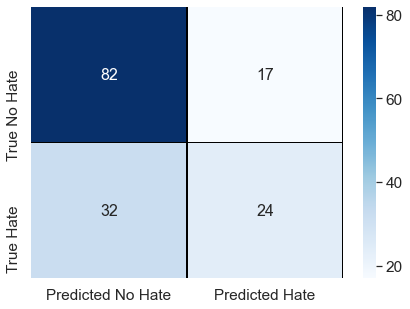

In [48]:
import seaborn as sn
import matplotlib.pyplot as plt

array = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(array,index=["True No Hate", "True Hate"],
                  columns = ["Predicted No Hate", "Predicted Hate"])
plt.figure(figsize = (7,5)
)
fig = sn.heatmap(df_cm, annot=True, annot_kws={"fontsize":16},
                 cmap=plt.cm.Blues, cbar=True, linewidth=0.5, linecolor="black")
sn.set(font_scale=1.8)
figure = fig.get_figure()    
figure.savefig('my_cm.pdf', dpi=400)

### Qualitative Fehleranalyse

#### Welche Kommentare wurden false positive klassifiziert?

In [30]:
#Ein super Trick!
false_positives = pd.DataFrame(X_test[y_test < y_pred])
#false positives heißt, fälschlicherweise als Hate klassifiziert.

In [31]:
false_positives

,Tweet
73,Manche sagen die #AfD Wähler sollen sich #schä...
445,#SternTV 24.02.16 soeben sofort weggezappt! Lü...
247,"lieber #Horst #Seehofer,das #Geld aus #Saudiar..."
75,#BeateUhse fördert #SCHARIA über Internet-Sexs...
386,Es gibt keine #rapefugees
463,#radikaler #Imam in #Dänemark ruft z #Steinigu...
140,#DeutscheBank sagt #Asylanten helfen der Wirts...
72,"Ein Soldat, der gegen Flüchtlinge ist und u.a...."
412,"Ab jetzt heißt es nicht mehr Leben, sondern Üb..."
302,Das Geld ging für Lunchpakete der #rapefugees ...


In [32]:
#Ihr könnt euch die Tweets als .csv-Datei abspeichern, um sie zu später analysieren!
false_positives.to_csv("False_positives.csv", encoding="utf-8", index=False)

#### Welche Kommentare wurden false negative klassifiziert?

In [33]:
X_test[y_test > y_pred] #Hier noch die false negatives, heißt, fälschlicherweise als No Hates klassifiziert.

55     lieber #Horst #Seehofer,der #Bayerische #Staat...
78     #Asylanten betteln jetzt auch in den Nachbardö...
408    Gute #Opfer von #Krimigranten & #Rapefugees ze...
456    Vorhin hat jemand gefragt, wie es mit der #Isl...
418    also die #fasnacht in diesem #jahr geht in die...
93     Die #Islamisierung des #Abendlandes ist die sc...
0      #Rosenmontag ist abgesagt. #Rapefugees also wi...
464    Wo ist das Problem? Für Moslems ist es doch sc...
30     Pöbelnde #Asylanten zeigen Kopf-ab-Gesten und ...
238    Worauf warten diese scheiss #Flüchtlinge und #...
406    #Diebstahl,#Einbruch,#sexuelle Übergriffe v. #...
39     #besorgteGutmenschen regen sich auf :  #Khaled...
301    Mensch #Gabriel, weil #Europa keine #Muslime h...
117    Gerüchten zufolge finden sich in den Netzen de...
124    Flüchtlinge zwangsweise in Privathaushalten ei...
415    #IS-#Sympathisant aus #Darmstadt,#Werbe-#Video...
277    #pegida ihr habt einen Maulwurf  Handabhacken ...
434    Die Tussi war voll naiv.

## Speichert euren trainierten Classifier für euch und die Nachwelt

In [34]:
import joblib

In [35]:
filename_model = "my_saved_model.pickle"
joblib.dump(model, filename_model) 
#model heißt hier das Objekt, in dem der gefittete Classifier gespeichert ist (s. oben).

['my_saved_model.pickle']

Auch der Vectorizer (hier `vec` genannt, s. oben) muss mitgespeichert werden, da er an deinem Data Set die Features für die Classification gelernt hat.

In [36]:
filename_vec = "my_saved_vec.pickle"
joblib.dump(vec, filename_vec)

['my_saved_vec.pickle']

### Lade das gespeicherte Model + Vectorizer und mache Predictions auf 3 neuen Kommentaren

In [37]:
#Load a saved model + the vectorizer
model = joblib.load("my_saved_model.pickle")
vec = joblib.load("my_saved_vec.pickle")

In [38]:
New_Comments = ["Ich bin ein böser Hasskommentar",
                "Ich hasse alle Menschen, fuck off",
                "Ich liebe alle Menschen"  
]

In [39]:
model.predict(vec.transform(New_Comments)) #Hmm...scheint unser Model wohl noch verbesserungswürdig! ;)

array(['NO', 'NO', 'NO'], dtype=object)

## Fertig!